In [1]:
with open('xoroshiro_results', 'r') as f:
    list_num = f. read().splitlines()

In [2]:
import numpy as np
list_arr = np.asarray(list_num)

In [3]:
list_arr

array(['1103527590', '4112169607805042350', '18410574733878275644', ...,
       '5009487634010739475', '14259176637643509966',
       '13219350076777631635'], dtype='<U20')

In [4]:
list_arr = list_arr.astype(np.float)

In [5]:
from scipy.stats import moyal
import numpy as np

In [6]:
num_min = list_arr.min()
num_max = list_arr.max()
print (f'min = {num_min}, max = {num_max}')

min = 1103527590.0, max = 1.8446739534333243e+19


In [7]:
X = list_arr[:150000]
Y = list_arr[150000:]

In [8]:
X_max = X.max()
X_min = X.min()
Y_max = Y.max()
Y_min = Y.min()
print(f'X_max = {X_max}, X_min={X_min}\n'
      f'Y_max={Y_max}, Y_min={Y_min}')

X_max = 1.8446739534333243e+19, X_min=1103527590.0
Y_max=1.8446509255152273e+19, Y_min=107184290291781.0


# Landau

In [9]:
div = 2**64-1

In [10]:
j = 0
for j in range(150000):
    X[j] = (X[j] / div)*(18+3)-3.
    Y[j] = (Y[j] / div)*0.25

In [11]:
X_max = X.max()
X_min = X.min()
Y_max = Y.max()
Y_min = Y.min()
print(f'X_max = {X_max}, X_min={X_min}\n'
      f'Y_max={Y_max}, Y_min={Y_min}')

X_max = 17.99999483231826, X_min=-2.9999999987437307
Y_max=0.24999681761512574, Y_min=1.452618004883324e-06


In [12]:
# lista in cui salvo i numeri tenunti
keep_list = np.array([])

In [13]:
for i in range(150000):
    xr = X[i]
    yr = Y[i]
    L = moyal.pdf(xr)
    if (yr > L): continue
    keep_list = np.append(keep_list, xr)

In [14]:
print(f'I numeri tenuti sono {len(keep_list)}')

I numeri tenuti sono 28229


In [15]:
with open('landau.txt', 'w') as f:
    for item in keep_list:
        f.write("%s\n" % item)

In [16]:
import matplotlib.pyplot as plt

In [23]:
a = keep_list.min()
b = keep_list.max()
x = np.linspace(a,b,50,endpoint=True)
y = moyal.pdf(x)

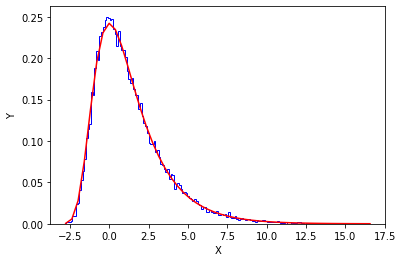

In [26]:
plt.hist(keep_list, bins = 180, color='blue', density=True, histtype='step')
plt.plot(x, y, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Then we draw a histogram with all the numbers we kept.

# Exponential

In [1]:
import numpy as np

In [2]:
# lista in cui salvo i numeri tenunti
keep_list = np.array([])

In [3]:
import math as mt
import random

In [4]:
i = 0

In [5]:
while i < 10000:
    xr = random.uniform(0,1)
    yr = np.random.exponential()
    L = mt.e**xr
    if (yr > L): continue
    keep_list = np.append(keep_list, xr)
    i = i + 1

In [6]:
print(f'I numeri tenuti sono {len(keep_list)}')

I numeri tenuti sono 10000


In [7]:
import matplotlib.pyplot as plt

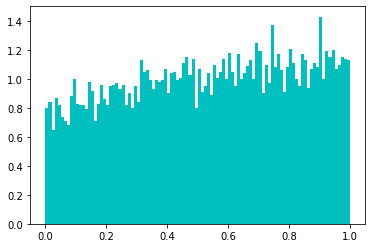

In [8]:
plt.hist(keep_list, bins = 100, color='c', density=True)
plt.show()

In [9]:
i = 0
numbers = np.array([])

for x in keep_list:
    f = mt.e**x
    numbers = np.append(numbers, f)

In [10]:
av = np.mean(numbers)
av

1.766811322254994

In [11]:
var = np.var(numbers)
var

0.24016970750808178

In [12]:
er = mt.sqrt(var)/10000
er

4.9516280454965924e-05

## meh

In [1]:
import numpy as np
import math as mt
import random

In [2]:
pdf = np.array([])
i = 0
while i < 10000:
    x = random.uniform(0,mt.e)
    y = mt.log(x) + 1
    if (y<0 or y>1): continue
    pdf = np.append(pdf, mt.log(x)+1)
    i = i + 1

In [3]:
import matplotlib.pyplot as plt

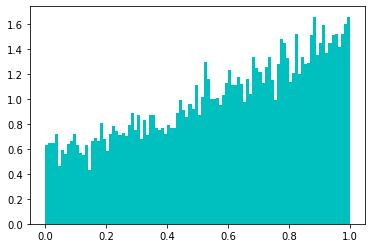

In [4]:
plt.hist(pdf, bins = 100, color='c', density=True)
plt.show()

In [5]:
numbers = np.array([])

for x in pdf:
    f = mt.e**(x)
    numbers = np.append(numbers, f)

In [6]:
var = np.var(numbers)
var

0.24406341684613336

In [7]:
er = mt.sqrt(var)/10000
er

4.940277490649016e-05